Name: Melvin Managbanag
Domain: Data Science and Business Analytics
Batch: April 2023
Company: The Sparks Foundation (TSF)

# **PREDICTION USING DECISION TREE ALGORITHM**

#### TASK 

- Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

#### DATA

- CSV format - https://bit.ly/3kXTdox

#### INDEX

- The dataframe
- Summary of the dataframe
- Processing and splitting the dataframe
- Training the data and creating the model
- Testing the model
- Storing the model
- Using the stored model
- Visualized the decision tree model

In [1]:
# Import for processing and training
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree


# Import for visualization
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

## *The dataframe*

In [2]:
df = pd.read_csv('Iris.csv')
print('Showing only the first 5 rows of the dataframe')
df.head(5)

Showing only the first 5 rows of the dataframe


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## *Summary of the dataframe*

In [16]:
# using the describe function
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
print(f' Row x Column \n {df.shape}')

 Row x Column 
 (150, 6)


## *Processing and splitting the dataframe*

In [5]:
# First we have to remove the id column

df = df.drop(columns=['Id'])
print('The Dataframe afte we removed the Id column')
df.head(3)

The Dataframe afte we removed the Id column


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


- #### X Values

In [6]:
# Second is we need to split the dataframe into two (x and y)

# Create a function which will do the splitting and will return a tuple

def values(z):
    y = df[z]
    x = df.drop(columns=[z])
    
    return x, y

In [7]:
# The Species column will be dropped from the df and the remaining column will be stored in x df
x_df = values('Species')[0]

# After splitting this is now x dataframe without the "Species" column
print('A portion of the X dataframe')
x_df[:3]

A portion of the X dataframe


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


- #### Y Values

In [8]:
# The Species column will be remained from the df
# and the remaining column will be stored in y df
y_df = values('Species')[1]

# After splitting this is now y dataframe with the "Species" column only
print('A portion of the Y dataframe')
y_df[:3]

A portion of the Y dataframe


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: Species, dtype: object

## *Training the data and creating the model.*

In [9]:
# We will again split the dataframe into testing and training
# Using 20% (0.2) for testing and 80% (0.8) for training

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)

In [10]:
# train a decision tree classifier model on the training data

model = DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

## *Testing the model*

In [11]:
# generate predictions for the testing data using the trained model

predict = model.predict(x_test.values)
print(predict)

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica']


In [12]:
# calculate and print the accuracy score of the model's predictions
# just checking the accuracy of the model 10 times.

for test_num in range(1, 10):
    score = accuracy_score(y_test.values, predict)
    print(score)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


## *Storing the model*

In [13]:
# Store the learning model

joblib.dump(model, 'iris_class.joblib')

['iris_class.joblib']

## *Using the stored model*

In [14]:
# We need to load the stored model

model_joblib = joblib.load('iris_class.joblib')

# We need to supply the x values in-order to predict which flower does fit. The values are from column
# SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm (values)

predict = model_joblib.predict([[7.0, 3.2, 4.7, 1.4]])
print(f'{predict} is the class predicted by the supplied values')

['Iris-versicolor'] is the class predicted by the supplied values


## *Visualized the decision tree*

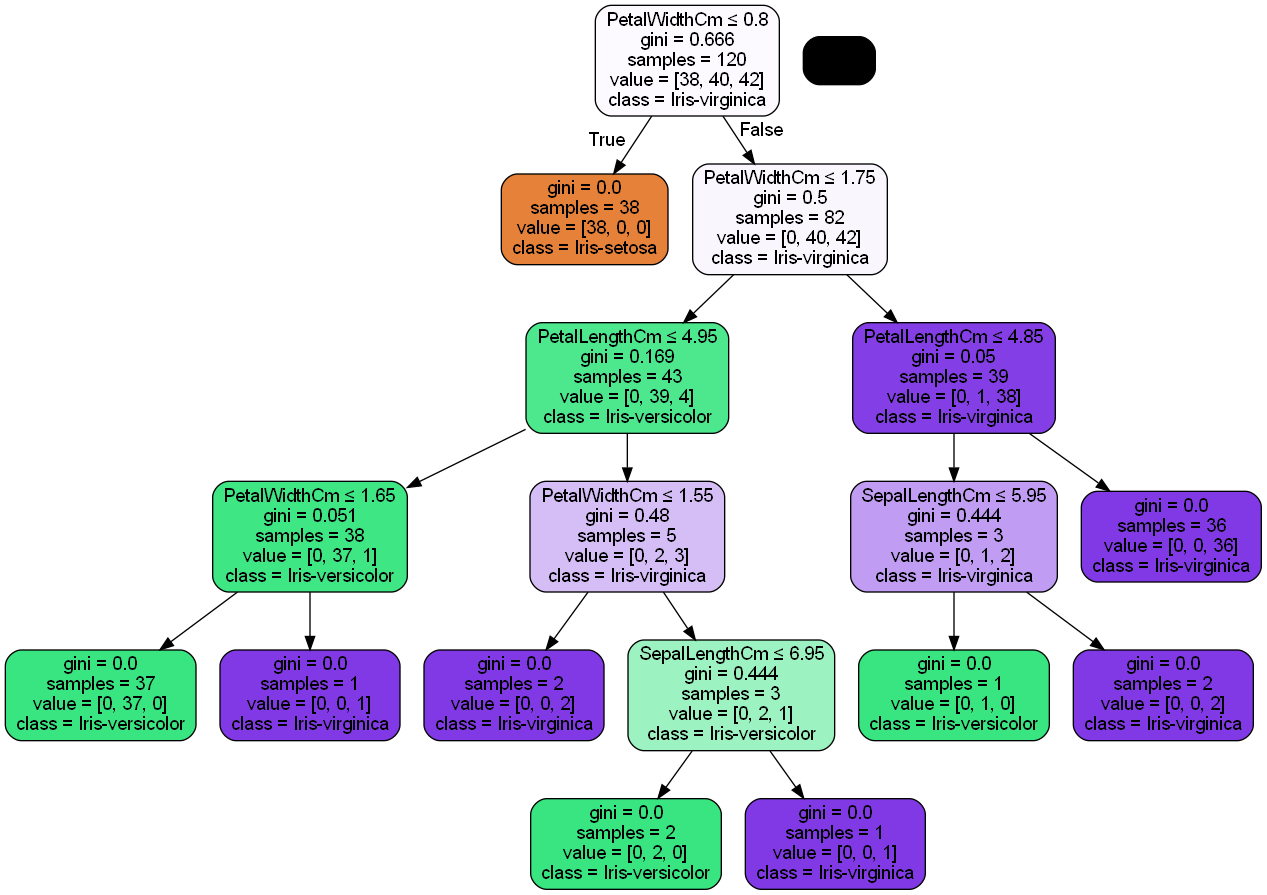

In [15]:
iris_class = StringIO()
export_graphviz(model, out_file='iris_class.dot',
                     feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                     class_names=sorted(y_train.unique()),
                     label='all',
                     rounded=True,
                     filled=True,
                     special_characters=True)


# Read the dot file from disk and create the graph object
with open('iris_class.dot') as f:
    dot_graph = f.read()
tree_graph = pydotplus.graph_from_dot_data(dot_graph)

# Convert the graph object to PNG and display it
Image(tree_graph.create_png())

## THANK YOU